<a href="https://colab.research.google.com/github/ParnLimwat/LearningMLbyProjects/blob/main/EDA_Project_Comparing_Languges_With_Latin_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**This EDM Project compares and contrasts various languages languages that uses Latin Script**

In [1]:
# importing libraries for manipulating the data set

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import unicodedata
from collections import Counter

**Data Set First Sight**

In [2]:
# Load in the data set
df = pd.read_csv("language_dataset.csv")

In [3]:
# Example Data
print(df.head())

                                                Text  language
0  klement gottwaldi surnukeha palsameeriti ning ...  Estonian
1  sebes joseph pereira thomas  på eng the jesuit...   Swedish
2  ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...      Thai
3  விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...     Tamil
4  de spons behoort tot het geslacht haliclona en...     Dutch


In [4]:
# Dataset Metadata
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22000 entries, 0 to 21999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      22000 non-null  object
 1   language  22000 non-null  object
dtypes: object(2)
memory usage: 343.9+ KB
None


In [5]:
# Number of Dataset per language
print(df['language'].value_counts())

language
Estonian      1000
Swedish       1000
English       1000
Russian       1000
Romanian      1000
Persian       1000
Pushto        1000
Spanish       1000
Hindi         1000
Korean        1000
Chinese       1000
French        1000
Portugese     1000
Indonesian    1000
Urdu          1000
Latin         1000
Turkish       1000
Japanese      1000
Dutch         1000
Tamil         1000
Thai          1000
Arabic        1000
Name: count, dtype: int64


**Data Cleaning**

In [11]:
# remove unrelated languages
latin_script_languages = ["Estonian", "Swedish", "Dutch", "Turkish", "Latin", "Indonesian", "French", "Spanish", "Romanian", "English"]
print(latin_script_languages)

['Estonian', 'Swedish', 'Dutch', 'Turkish', 'Latin', 'Indonesian', 'French', 'Spanish', 'Romanian', 'English']


In [12]:

language_char_freq = {}

for lang in latin_script_languages:
  # filter
  text_series = df[df['language'] == lang]['Text']


  combined_text = ''.join(text_series.dropna())  #avoids NaN issues

  combined_text = combined_text.replace(" ", "")


  # Create translation table that maps each punctuation character to None
  translator = str.maketrans('', '', string.punctuation)
  combined_text = combined_text.translate(translator)


  char_freq = dict(Counter(combined_text))


  sorted_freq = dict(sorted(char_freq.items(), key=lambda item: item[1], reverse=True))


  language_char_freq[lang] = sorted_freq


**Character Frequency Example: English**

In [7]:
# Example Print out for English
print("Character freqencies for English")
print(language_char_freq.get("English",{}))

Character freqencies for English
{'e': 40076, 'a': 29361, 't': 28462, 'i': 25402, 'o': 25011, 'n': 24745, 's': 22655, 'r': 22166, 'h': 15910, 'l': 14245, 'd': 13337, 'c': 12343, 'm': 8943, 'u': 8915, 'f': 7376, 'p': 6743, 'g': 6655, 'w': 5853, 'b': 5545, 'y': 5264, 'v': 3189, 'k': 2657, 'j': 834, 'x': 617, 'z': 428, 'q': 343, '–': 90, '’': 68, 'é': 44, '—': 32, '“': 24, '”': 14, '−': 12, 'è': 10, 'ō': 10, 'ó': 8, '„': 8, 'ö': 7, 'н': 7, 'ł': 7, '£': 7, 'ü': 6, 'ä': 6, '×': 6, 'í': 6, 'ā': 6, '⁄': 6, 'د': 5, 'ا': 5, '\u200e': 5, 'о': 5, '€': 5, 'ș': 5, 'ل': 4, 'у': 4, 'д': 4, 'с': 4, 'к': 4, '‘': 4, 'ˈ': 4, 'و': 3, 'ك': 3, 'ع': 3, 'á': 3, 'म': 3, 'न': 3, 'б': 3, 'ё': 3, 'в': 3, 'ń': 3, 'ą': 3, 'κ': 3, 'ι': 3, 'ς': 3, 'م': 3, 'ر': 3, '…': 3, 'ز': 2, 'ي': 2, 'ा': 2, '्': 2, 'а': 2, 'р': 2, 'е': 2, 'й': 2, 'и': 2, 'ʒ': 2, '\x9d': 2, 'ο': 2, 'λ': 2, 'α': 2, 'ş': 2, '°': 2, '′': 2, 'ę': 2, 'ح': 2, 'ی': 2, 'י': 2, 'ﬂ': 2, 'ف': 2, 'ب': 2, 'ū': 2, 'ī': 2, 'ე': 2, 'ː': 2, 'ʼ': 2, 'æ': 2, 'γ': 2,

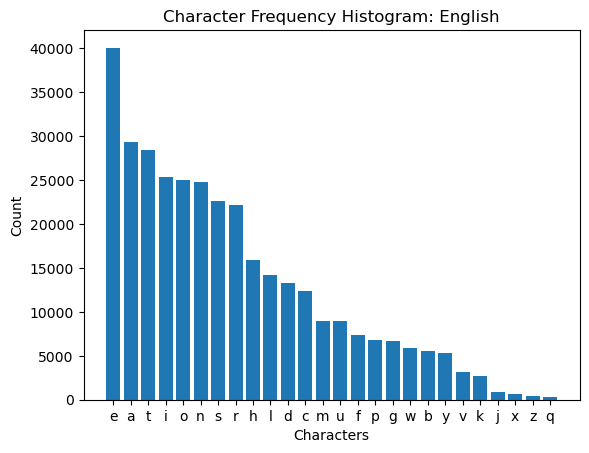

In [26]:
# Separate keys and values
test = language_char_freq.get("English", {})
characters = list(test.keys())
counts = list(test.values())

# Filter characters and counts where count >= 100
filtered = [(char, count) for char, count in zip(characters, counts) if count >= 100]
characters, counts = zip(*filtered) if filtered else ([], [])

# Create the bar plot
plt.bar(characters, counts)
plt.xlabel('Characters')
plt.ylabel('Count')
plt.title('Character Frequency Histogram: English')
plt.show()


In [27]:
#Print out all frequency
for lang in latin_script_languages:
  print(f"Character frequencies for {lang}:")
  print(language_char_freq.get(f"{lang}", {}))
  print()

Character frequencies for Estonian:
{'a': 32918, 'i': 27114, 'e': 26563, 's': 23361, 't': 18829, 'l': 15708, 'n': 14221, 'u': 13620, 'o': 12558, 'k': 11551, 'r': 10336, 'd': 9873, 'm': 9067, 'v': 5876, 'g': 4866, 'p': 4721, 'j': 4448, 'h': 4260, 'b': 2594, 'õ': 2529, 'ä': 2512, 'ü': 1837, 'f': 897, 'c': 811, 'ö': 573, 'y': 336, '–': 298, 'w': 265, 'z': 169, 'о': 98, 'и': 91, 'а': 82, 'н': 77, 'с': 74, 'x': 67, 'е': 64, 'š': 62, 'р': 54, 'к': 53, 'в': 51, 'т': 45, '„': 42, '“': 40, 'л': 37, '”': 36, 'ž': 34, '’': 34, 'м': 33, 'д': 31, 'п': 26, 'у': 25, 'é': 23, 'г': 23, 'q': 22, 'й': 21, '−': 18, '°': 18, 'ā': 16, 'х': 15, 'з': 14, 'ц': 12, 'б': 12, 'я': 11, 'á': 11, 'ж': 9, 'ч': 9, '²': 9, 'ы': 8, 'э': 8, 'ŭ': 8, '→': 7, 'č': 7, '‘': 7, 'í': 6, 'ь': 6, 'ł': 6, '×': 6, 'ū': 5, 'ó': 5, 'ņ': 5, 'è': 5, 'ш': 4, '«': 4, 'ф': 4, 'ю': 4, 'ę': 3, 'ń': 3, '»': 3, 'ô': 3, 'ú': 3, 'ß': 3, 'â': 3, 'ī': 2, 'ו': 2, 'ї': 2, 'і': 2, 'ō': 2, '′': 2, '莊': 2, '子': 2, '庄': 2, '周': 2, 'ǎ': 2, 'å': 2, 'ə': 

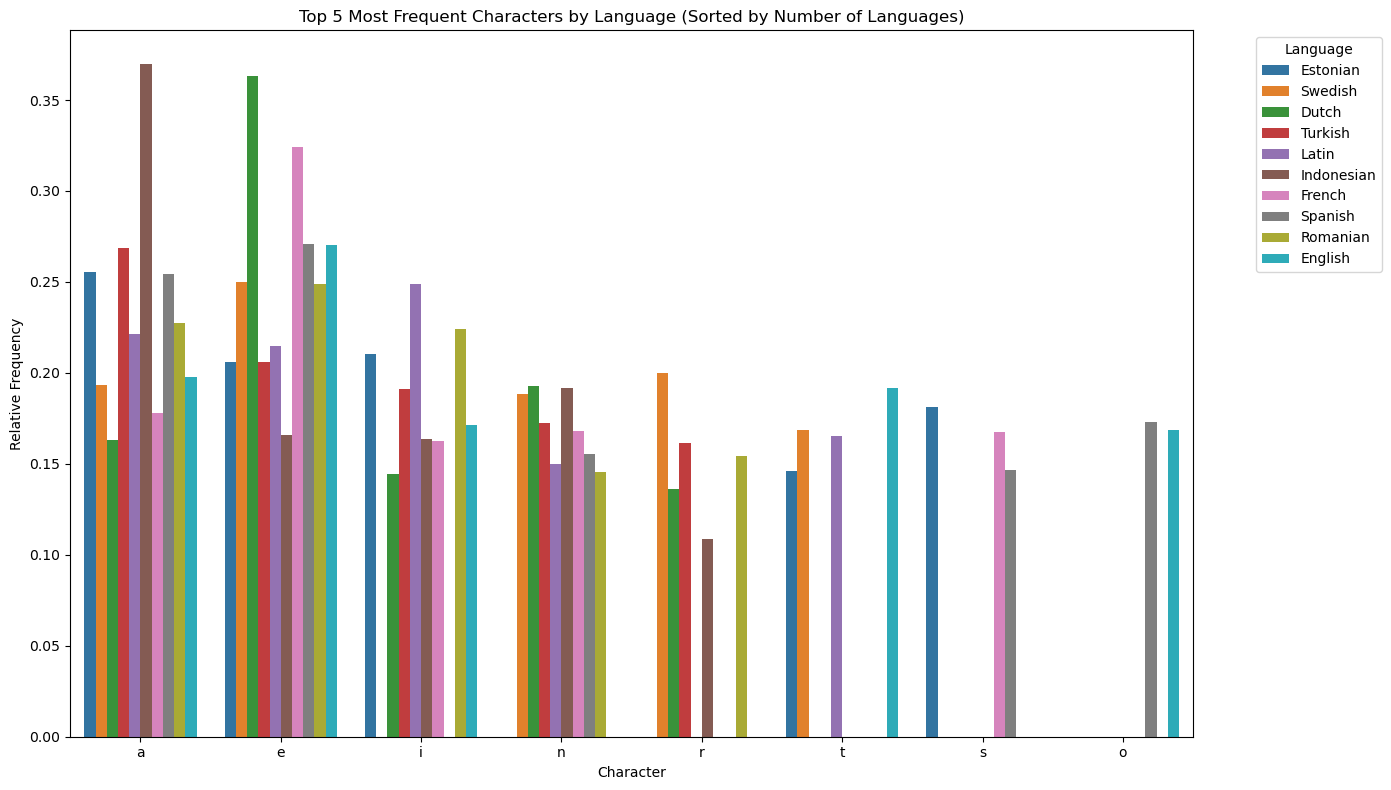

In [31]:
# Parameters
top_n = 5

# Extract top N characters for each language
records = []
for lang, freq_dict in language_char_freq.items():
    sorted_items = sorted(freq_dict.items(), key=lambda x: x[1], reverse=True)[:top_n]
    for char, freq in sorted_items:
        records.append({"Language": lang, "Character": char, "Frequency": freq})

df = pd.DataFrame(records)

# Count in how many languages each character appears
char_language_counts = df.groupby('Character')['Language'].nunique()

# Sort characters by how many languages they appear in (descending)
sorted_chars = char_language_counts.sort_values(ascending=False).index.tolist()

# Normalize frequencies per language (optional)
df['Total'] = df.groupby('Language')['Frequency'].transform('sum')
df['Normalized_Freq'] = df['Frequency'] / df['Total']

# Set category order for the X-axis based on sorted_chars
df['Character'] = pd.Categorical(df['Character'], categories=sorted_chars, ordered=True)

plt.figure(figsize=(14, 8))
sns.barplot(data=df, x="Character", y="Normalized_Freq", hue="Language")
plt.title(f"Top {top_n} Most Frequent Characters by Language (Sorted by Number of Languages)")
plt.ylabel("Relative Frequency")
plt.xlabel("Character")
plt.legend(title="Language", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**Insights and Analysis**